In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [7]:
dates = [datetime(2018, 1, 1), 
         datetime(2018, 1, 2), 
         datetime(2018, 1, 3), 
         datetime(2018, 1, 4), 
         datetime(2018, 1, 5), 
        ]

# Lets create a simple timeseries object - a Series indexed by timestamp 
ts = pd.Series(np.random.rand(5)*1000 , index=dates)

TimeSeries objects have a DateTimeIndex 

In [2]:
# Timeseries analysis involves a datetime field and some other statistics. One of the most popular type is stock
# We will use Bombay Stock Index for the year 2017
bse = pd.read_csv('./data/bse_sensex_2017.csv', header=0, sep=',', index_col='Date', parse_dates=True)
bse.info()
bse.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2017-01-02 to 2017-12-29
Data columns (total 4 columns):
Open     248 non-null float64
High     248 non-null float64
Low      248 non-null float64
Close    248 non-null float64
dtypes: float64(4)
memory usage: 9.7 KB


,Open,High,Low,Close
Date,,,,
2017-01-02,26711.15,26720.98,26447.06,26595.45
2017-01-03,26616.92,26724.40,26488.37,26643.24
2017-01-04,26677.22,26723.37,26606.06,26633.13
2017-01-05,26738.42,26917.21,26738.42,26878.24
2017-01-06,26929.69,27009.61,26733.33,26759.23


In [3]:
# With a date based index, we can slice the data in a veriety of ways
# For example, we can get all January info using a partial index '2017-01'
jan = bse['2017-01']

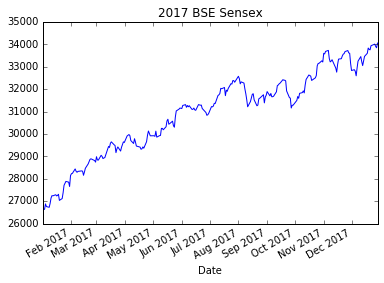

In [29]:
# Let's plot the closing value for 2017 to understand how it changed
bse['Close'].plot()
plt.title('2017 BSE Sensex')

,Open,High,Low,Close,Fluctuation
Date,,,,,
2017-12-18,33364.52,33801.9,32595.63,33601.68,1206.27


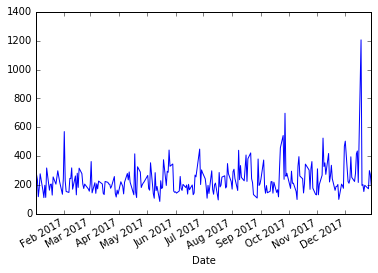

In [50]:
# Let's find out the daily fluctuations
bse['Fluctuation'] = bse['High'] - bse['Low']

# Plot the fluctuations to see whether there are any trends
bse['Fluctuation'].plot()

# Get record for the day with maximum fluctuation
maxFluctuation = bse['Fluctuation'].max()
bse[bse['Fluctuation']==maxFluctuation]


Plot shows quite a large blip that was recorded on Dec 18th

### Resampling time series data

In [51]:
bse.resample('M')

,Open,High,Low,Close,Fluctuation
Date,,,,,
2017-01-31,27157.728571,27268.113333,27064.164762,27165.459048,203.948571
2017-02-28,28456.787895,28562.178947,28329.183684,28457.402105,232.995263
2017-03-31,29282.500000,29369.064091,29179.381364,29269.491364,189.682727
2017-04-30,29728.955000,29810.718889,29587.851111,29695.834444,222.867778
2017-05-31,30411.618636,30534.208636,30303.888636,30420.066818,230.320000
2017-06-30,31196.161429,31273.801429,31066.093333,31144.678571,207.708095
2017-07-31,31873.493810,31969.283810,31761.241429,31879.607143,208.042381
2017-08-31,31855.618571,31926.619524,31661.410476,31772.229048,265.209048
2017-09-30,31964.489524,32043.545238,31784.698571,31887.121429,258.846667
